>## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step2: Load DataSet

In [2]:
df=pd.read_csv("loan.csv")
df.head(3)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied


### Step3: Data Processing 
Perform data preprocessing tasks such as handling missing values , encoding categorical values , and feature scaling 

In [3]:
df.shape

(61, 8)

In [4]:
df["loan_status"].value_counts()

loan_status
Approved    45
Denied      16
Name: count, dtype: int64

In [5]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [6]:
df.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [8]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [9]:
df.duplicated().sum()

np.int64(0)

> No Duplicate Value In The Dataset 

## Perform the some basic visulaization on the dataset
"" TO understand the pattern and trends in the dataset""

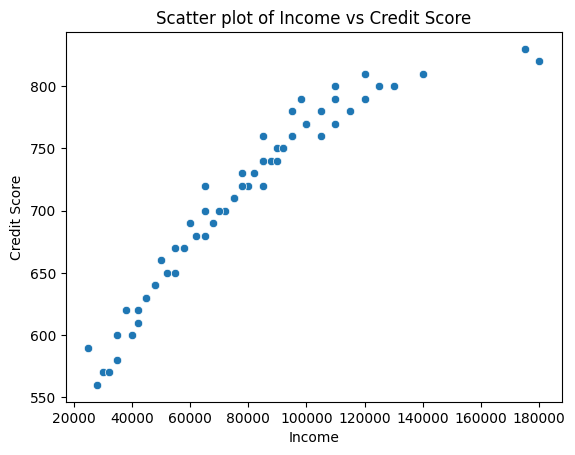

Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.


In [10]:
# Scatter plot of income vs credit score
sns.scatterplot(x="income", y="credit_score", data=df)
plt.title('Scatter plot of Income vs Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.")

<Figure size 1000x600 with 0 Axes>

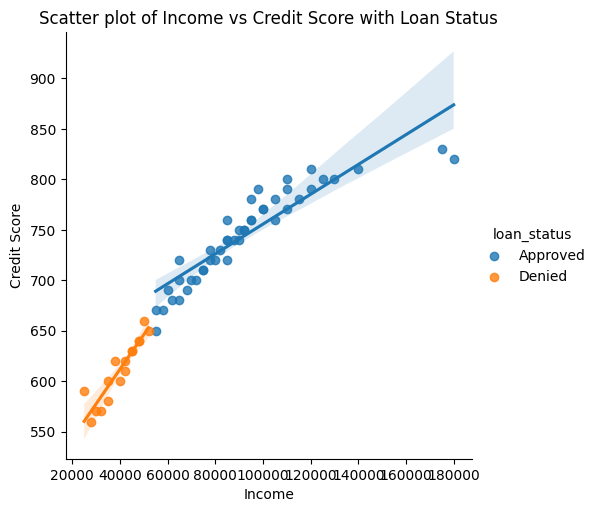

Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).


In [11]:
# Scatter plot of income vs credit score with loan status hue
plt.figure(figsize=(10, 6))
sns.lmplot(x="income", y="credit_score", data=df, hue="loan_status")
plt.title('Scatter plot of Income vs Credit Score with Loan Status')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).")

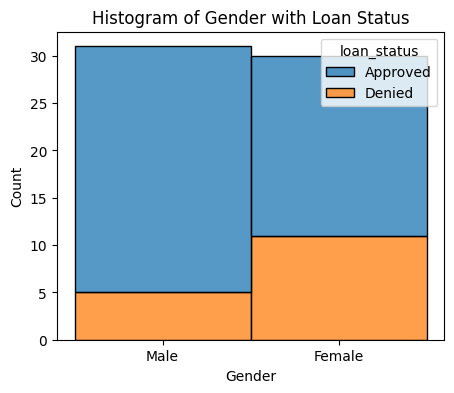

Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).


In [12]:
# Histogram of gender with loan status hue
plt.figure(figsize=(5, 4))
sns.histplot(x="gender", data=df, hue="loan_status", multiple="stack")
plt.title('Histogram of Gender with Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print("Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).")


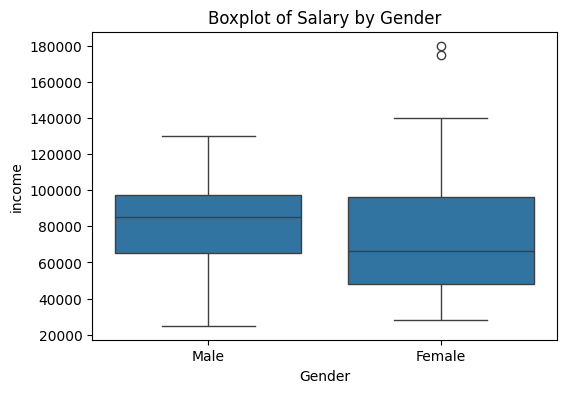

Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers


In [13]:
# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='income', data=df)
plt.title('Boxplot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('income')
plt.show()
print("Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers")

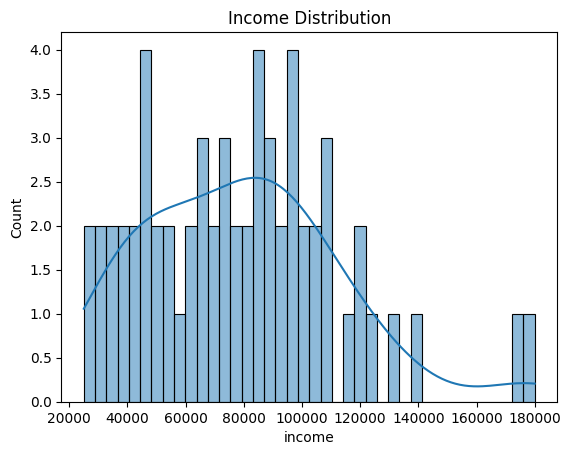

In [14]:
# Distribution of income
sns.histplot(df['income'], bins=40,kde=True)
plt.title("Income Distribution")
plt.show()

### Types of columns in the data set 

In [15]:
cat = df.select_dtypes(include=['object'])               # This will show how many categorical columns we have 
num = df.select_dtypes(include=['int64', 'float64'])     # This will show how many numerical columns we have 
print("Categorical columns: ", cat.columns)
print("Numerical columns: ", num.columns)

Categorical columns:  Index(['gender', 'occupation', 'education_level', 'marital_status',
       'loan_status'],
      dtype='object')
Numerical columns:  Index(['age', 'income', 'credit_score'], dtype='object')


### Encode binary variables into label encoder(e.g 0/1 columns)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat:  # Here we applying for loop in above cat variables to convert categorical variable to numerical  
    df[col] = label_encoder.fit_transform(df[col])
df.head(3)
   

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1


#### here we draw the heatmap for checking the correlation between each column

<Axes: >

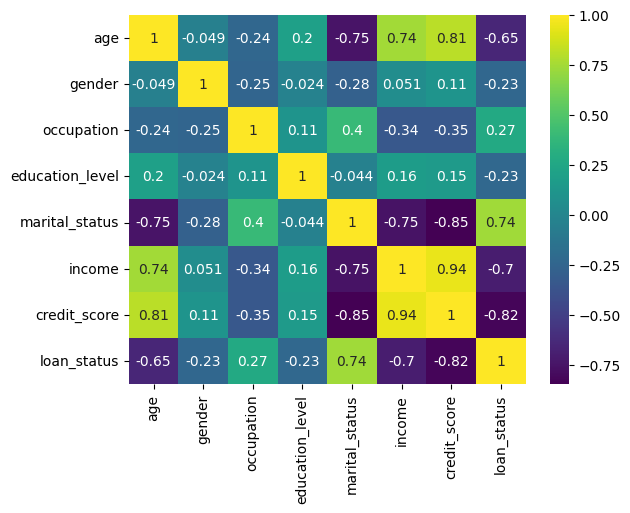

In [17]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="viridis")  

#####            strong positive correlation
      1.Heatmap shows income and credit_score which was ---> (+0.94)
      2.Heatmap shows Age and credit_score which was ---> (+0.81)
 #####           strong negative correlation
     1.Heatmap shows loan_status and credit_score which was --->  (-0.82)
     2.Heatmap shows Age and Martial_status which was --->  (-0.75)
     3.Heatmap shows Income and Martial_status which was --->  (-0.75)
     4.Heatmap shows Credit_score and Martial_status which was --->  (-0.85)
#####             Weak Correlation
      1. Gender with most variables
      2. Education Level with most variables 

### Keeping important columns 

In [18]:
## There is a no use of occupation , education_level, martial_status columns in the dataset so we can either do drop those columns in the dataset.
columns = ["age","gender","income","credit_score","loan_status"]
df=df[columns]
df.head(3)

,age,gender,income,credit_score,loan_status
0,32,1,85000,720,0
1,45,0,62000,680,0
2,28,1,25000,590,1


### Split the dataset into training and testing sets 

In [19]:
X = df.drop("loan_status",axis=1) ## Here we select our loan_status column as a output column and remaining 
y = df["loan_status"]           ##  --column as input columns so here we drop from x and assign to y 


In [20]:
## Split the data into trainig and testing and import library of sklearn

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 8 to 38
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           45 non-null     int64
 1   gender        45 non-null     int64
 2   income        45 non-null     int64
 3   credit_score  45 non-null     int64
dtypes: int64(4)
memory usage: 1.8 KB


### Standardize  Scaling features for logistic regression 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.62696233,  0.89442719,  0.17874411,  0.14686353],
       [-1.63010205, -1.11803399, -0.90347021, -0.97804859],
       [-0.75235479,  0.89442719, -0.4062366 , -0.41559253],
       [ 2.13167192, -1.11803399,  0.17874411,  0.70931959],
       [ 0.25078493, -1.11803399, -0.02599914,  0.28747754],
       [ 1.63010205, -1.11803399,  1.20246035,  1.41238966],
       [-1.00313973,  0.89442719, -1.42995285, -1.9623467 ],
       [-1.25392466, -1.11803399, -1.28370767, -1.54050465],
       [-1.37931712,  0.89442719, -1.07896442, -1.39989064],
       [ 0.12539247,  0.89442719,  0.090997  ,  0.28747754],
       [ 1.25392466, -1.11803399,  1.78744106,  1.41238966],
       [-0.87774726, -1.11803399, -0.69872696, -0.83743458],
       [-0.3761774 ,  0.89442719,  0.26649121,  0.42809156],
       [ 1.75549452, -1.11803399,  0.76372482,  0.99054762],
       [ 0.87774726, -1.11803399,  0.17874411,  0.42809156],
       [ 0.50156986, -1.11803399,  1.34870553,  1.27177565]])

In [24]:
df.head(2)

,age,gender,income,credit_score,loan_status
0,32,1,85000,720,0
1,45,0,62000,680,0


### Model Development 

> 1. **logistic regression**

In [25]:
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_predict =lg.predict(X_test)

In [26]:
lg_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [27]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,lg_predict))
print("\n R2 Score Is:",r2_score(y_test,lg_predict))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,lg_predict))
print("\n Classification Report:\n", classification_report(y_test, lg_predict))
print("\n Confusion Matrix:", confusion_matrix(y_test, lg_predict))

Accuracy Score Is: 0.9375

 R2 Score Is: 0.6666666666666667

 Mean Absolute Error Is: 0.0625

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


 Confusion Matrix: [[11  1]
 [ 0  4]]


> 2. **Random Forest classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred =rf.predict(X_test)

In [29]:
rf_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [30]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,rf_pred))
print("\n R2 Score Is:",r2_score(y_test,rf_pred))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,rf_pred))
print("\n Classification Report:\n", classification_report(y_test, rf_pred))
print("\n Confusion Matrix:", confusion_matrix(y_test, rf_pred))

Accuracy Score Is: 0.9375

 R2 Score Is: 0.6666666666666667

 Mean Absolute Error Is: 0.0625

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


 Confusion Matrix: [[11  1]
 [ 0  4]]


> 3. **SVC (Support Vector Classifier)**

In [31]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train ,y_train)
svc_pre = svc_model.predict(X_test)

In [32]:
svc_pre

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [33]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,svc_pre))
print("\n R2 Score Is:",r2_score(y_test,svc_pre))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,svc_pre))
print("\n Classification Report:\n", classification_report(y_test, svc_pre))
print("\n Confusion Matrix:", confusion_matrix(y_test,svc_pre))

Accuracy Score Is: 0.9375

 R2 Score Is: 0.6666666666666667

 Mean Absolute Error Is: 0.0625

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


 Confusion Matrix: [[11  1]
 [ 0  4]]


> 4. **(KNN) K--Nearest Neighbors**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pre =knn.predict(X_test)

In [35]:
knn_pre

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [36]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,knn_pre))
print("\n R2 Score Is:",r2_score(y_test,knn_pre))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,knn_pre))
print("\n Classification Report:\n", classification_report(y_test,knn_pre))
print("\n Confusion Matrix:", confusion_matrix(y_test,knn_pre))

Accuracy Score Is: 0.9375

 R2 Score Is: 0.6666666666666667

 Mean Absolute Error Is: 0.0625

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


 Confusion Matrix: [[11  1]
 [ 0  4]]


> 5. **Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dec_pred = dt.predict(X_test)

In [38]:
dec_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [39]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,dec_pred))
print("\n R2 Score Is:",r2_score(y_test,dec_pred))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,dec_pred))
print("\n Classification Report:\n", classification_report(y_test,dec_pred))
print("\n Confusion Matrix:", confusion_matrix(y_test,dec_pred))

Accuracy Score Is: 1.0

 R2 Score Is: 1.0

 Mean Absolute Error Is: 0.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


 Confusion Matrix: [[12  0]
 [ 0  4]]


> 6. **Naive Bayes**

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)
nb_pred = nb.predict(X_test)

In [41]:
nb_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

> **Accracy score** **,** **classification_report**  **,**  **confusion_matrix**  **,**   **r2_score**  **,**  **mean_absolute_error** 

In [42]:
from sklearn .metrics import accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix 

print("Accuracy Score Is:",accuracy_score(y_test,nb_pred))
print("\n R2 Score Is:",r2_score(y_test,nb_pred))
print("\n Mean Absolute Error Is:",mean_absolute_error(y_test,nb_pred))
print("\n Classification Report:\n", classification_report(y_test,nb_pred))
print("\n Confusion Matrix:", confusion_matrix(y_test,nb_pred))

Accuracy Score Is: 0.9375

 R2 Score Is: 0.6666666666666667

 Mean Absolute Error Is: 0.0625

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


 Confusion Matrix: [[11  1]
 [ 0  4]]


## Predicitive System For Checking How The Model Is Working 

In [56]:
def predictive(age,gender,income,credit_score):          # First we define the function for columns in which we are working 
   
    ## Encode the categorical columns 
    Encoded_gender  = label_encoder.fit_transform(df["gender"]) # Then we encode the columns which are categorical I have only one categorical column
  
    ## Prepare Features Array 
    features = np.array([[age,gender,income,credit_score]])  # Then we convert are columns to 2d array 
    
    ## Scalling
    scaled_features = scaler.transform(features)            # Then we do transform features columns 

    ## Predict by model
    result = lg.predict(scaled_features)                  # Atlast we finally predict the model by logisicRegression 
    return result[0]

In [57]:
y=np.array([1,2,3,4,5,67,6])
print(y)
print(type(y))
print(y.ndim)

y=np.array([[1,2,3],[5,6,7]])
print(y)
print(type(y))
print(y.ndim)

y=np.array([[[1,2,3],[5,6,7],[34,55,66]]])
print(y)
print(type(y))
print(y.ndim)

[ 1  2  3  4  5 67  6]
<class 'numpy.ndarray'>
1
[[1 2 3]
 [5 6 7]]
<class 'numpy.ndarray'>
2
[[[ 1  2  3]
  [ 5  6  7]
  [34 55 66]]]
<class 'numpy.ndarray'>
3


In [58]:
df.iloc[2]

age                28
gender              1
income          25000
credit_score      590
loan_status         1
Name: 2, dtype: int64

In [61]:
### Test 1 In this test we have pass all the input variables to 2nd row value of the dataset to see how our model is predicting our output value :

age = int(input("Enter the Age :"))
gender = float(input("Choose the Gender As \n 1 for Male: \n 0 for Female:"))
income = float(input("Enter the Income :"))
credit_score = float(input("Enter the Credit_Score :"))

result=predictive(age,gender,income,credit_score)
if result==0:
    print("Loan Approved:\n Now you get a loan:")
else:
    print("Loan Denied:\n You cannot get a loan:")

Enter the Age : 29
Choose the Gender As 
 1 for Male: 
 0 for Female: 1
Enter the Income : 30000
Enter the Credit_Score : 570


Loan Denied:
 You cannot get a loan:


In [47]:
df.sample(5)

,age,gender,income,credit_score,loan_status
24,40,1,60000,690,0
48,34,1,78000,720,0
47,48,0,175000,830,0
34,29,1,30000,570,1
52,37,1,92000,750,0


##### > So here we can see our model is predicting true value as a output so we can say our model is working good 

In [48]:
## Test 2 In this test we have pass all the input variables to 50 row value of the dataset to see how our model is predicting our output value :

age = int(input("Enter the Age :"))
gender = float(input("Choose the Gender As \n 1 for Male: \n 0 for Female:"))
income = float(input("Enter the Income :"))
credit_score = float(input("Enter the Credit_Score :"))

result=predictive(age,gender,income,credit_score)
if result==0:
    print("Loan Approved:\n Now you get a loan:")
else:
    print("Loan Denied:\n You cannot get a loan:")

Enter the Age : 12
Choose the Gender As 
 1 for Male: 
 0 for Female: 1
Enter the Income : 2353
Enter the Credit_Score : 32


Loan Denied:
 You cannot get a loan:


#### Uing Pickle Library To Save This Model

In [49]:
import pickle 
pickle.dump(lg,open("Loan_Model.pkl","wb"))

### Model Completion Succesfully

 Model has been trained and saved successfully.

---> The dataset has been cleaned and preprocessed.

---> The dataset has been split into training and testing sets with a test size of 25%.

---> Logistic Regression ,Random Forest ,Support Vector Classoifier ,K-Nearest Neighbors  ,Decision Tree  ,Naive Bayes have been evaluated using accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix.

---> The model with the highest accuracy score is approximately **93%**

---> The model can now be used to predict loan status based on the provided features.

---> The model has been saved to a pickle file named "Loan_Model.pkl". 

--->This file can be used to load the trained model and make predictions on new data.

> **Now Model Is Ready To Host**